In [1]:
# Question 2: Logistic Regression
!pip install -U pandas
!pip install -U numpy
!pip install -U plotly==5.10.0

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

dataset = np.genfromtxt('../data/q2/q2test.csv', delimiter=',')

x1 = dataset[1:, 0].reshape(-1,1)
x2 = dataset[1:, 1].reshape(-1,1)
y_test = dataset[1:, 2].reshape(-1,1)
x0 = np.ones((x1.shape))
x_test = np.append(x0, x1, axis=1)
x_test = np.append(x_test, x2, axis=1)
n = x_test.shape[0]

     --------------------------------------- 10.0/10.0 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:
      Successfully uninstalled pandas-1.4.3


In [2]:
#Question 2.a - Sample million of points

#Data points given
data_points= 1000000
#Intercept term
x0 = np.ones((data_points,1)) 

#Samples
x1 = np.random.normal(3, 2, data_points).reshape(-1,1)
x2 = np.random.normal(-1, 2, data_points).reshape(-1,1)

#Create matrix
x = np.append(x0,x1,axis=1)
x = np.append(x, x2, axis=1)

#Sample epsilon error
eps = np.random.normal(0, np.sqrt(2), data_points).reshape(-1,1)

theta = np.array([[3], [1], [2]])

#Generate the value of Y (given X, parameterized by given Theta)
y = np.dot(x,theta) + eps

#Shuffle data
temp = np.append(x, y, axis=1)
np.random.shuffle(temp)

x = temp[:,0:3]
y = temp[:,-1:]

In [3]:
#Question 2.b - Apply Stochastic gradient descent
import time

theta = np.zeros((3,1))
alpha = 0.001  
b_size = np.array([1, 100, 10000, 1000000])

# Prediction function: h(θ) = x^Tθ 
def predict(x, theta):
    return x.dot(theta)

# Cost function: J(θ) = 1/2m * Σ(y-h(θ))^2
def cost(x,y,theta, m):
    return (1/(2*m)) * np.sum((y - predict(x,theta))**2)

cost_0 = cost(x, y, theta, data_points)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_0))


def cost_grd(x, y, theta, m):
    return (1/m) * (np.zeros((3,1))+  x.T.dot(x.dot(theta)-y))


# Stochastic descent function
def stochastic_gradient_descent(x, y, theta, alpha, r, threshold=10e-7):
    
    start = time.time()

    i=0
    c=0.0
    theta_hist = theta
    c_avg = np.array([cost(x[0], y[0], theta, 1)])

    while(True):
        i+=1
        count = 0
        c_init = cost(x, y,theta, data_points)
        for b in mini_batch:
            x_b = b[0]
            y_b = b[1]
            c += cost(x_b, y_b, theta, r)
            
            check = 10000 if r==1 else 100 if r==100 else 10 if r==10000 else 1
            if(count%check == 0 and count!=0):
                c /= check
                print("Current average cost = {}".format(c)) 
                c_avg = np.append(c_avg, c)
                c=0.0
            theta -= alpha * cost_grd(x_b, y_b, theta, r)
            theta_hist = np.append(theta_hist,theta,axis=1)
            count +=1
        c_final = cost(x, y, theta, data_points)
        if (abs(c_final - c_init) < threshold):
            print(c_final, c_init, c_final-c_init)
            break
    
    end = time.time()
        

    return theta, c_final, theta_hist, i, end-start



values = []
for r in b_size:
    #number of batches (sub batches stored in an array mini_batch)
    mini_batch = [(x[i:i+r,:], y[i:i+r]) for i in range(0, data_points, r)]
    theta, c_final, theta_hist, iterations, t = stochastic_gradient_descent(x, y, theta, alpha, r)
    print(f'Cost of the model is {c_final} with {iterations} iterations and {t} s')
    values.append((theta, c_final, theta_hist, iterations, t, r))



print(values)

Initial Cost value for the hypothesis with zero parameters=18.996050689813394
Current average cost = 1.3426436757666902
Current average cost = 0.9866057070784927
Current average cost = 1.0008674265573825
Current average cost = 1.0031280232967605
Current average cost = 0.9901751411879972
Current average cost = 1.0196801137258862
Current average cost = 1.0081201288076946
Current average cost = 1.0175010814833718
Current average cost = 1.0083663946054386
Current average cost = 0.9982187868324108
Current average cost = 1.0180603788050493
Current average cost = 0.9867630024297492
Current average cost = 1.0243224816007321
Current average cost = 1.011733343702691
Current average cost = 1.0248904436035384
Current average cost = 1.0223304549804682
Current average cost = 1.0033027406228565
Current average cost = 0.9961973144498246
Current average cost = 1.0072522458946682
Current average cost = 1.0403158552641594
Current average cost = 1.0080400644442737
Current average cost = 1.0168970793808174

In [20]:
err_og = cost(x_test, y_test, np.array([[3],[1],[2]]), n)
print("The Test error on Original Hypothesis with theta = 0 is = {}".format(err_og))

for value in values:
    (theta, c_final, theta_hist, iterations, time, r) = value
    err_new = cost(x_test, y_test, theta, n)
    print("The Test error on Learned Hypothesis = {}, , for r = {}".format(err_new, r))

    print("The difference in the test error of original and learned hypothesis is = {}, for r = {}".format(err_new-err_og, r))

The Test error on Original Hypothesis with theta = 0 is = 0.9829469215
The Test error on Learned Hypothesis = 0.9832132552477028, , for r = 1
The difference in the test error of original and learned hypothesis is = 0.00026633374770279605, for r = 1
The Test error on Learned Hypothesis = 0.9832132552477028, , for r = 100
The difference in the test error of original and learned hypothesis is = 0.00026633374770279605, for r = 100
The Test error on Learned Hypothesis = 0.9832132552477028, , for r = 10000
The difference in the test error of original and learned hypothesis is = 0.00026633374770279605, for r = 10000
The Test error on Learned Hypothesis = 0.9832132552477028, , for r = 1000000
The difference in the test error of original and learned hypothesis is = 0.00026633374770279605, for r = 1000000


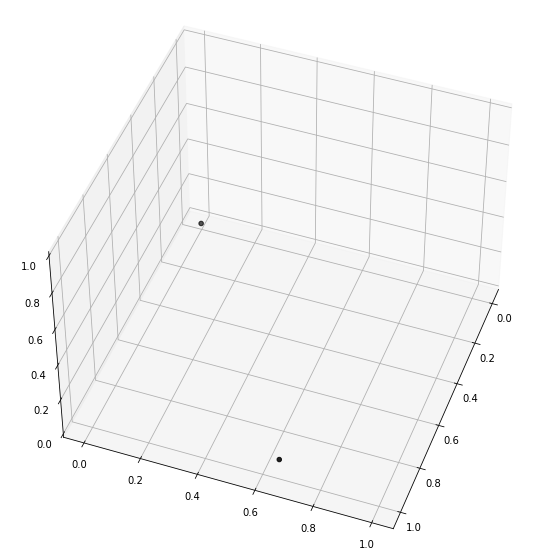

In [21]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)

(theta, c_final, theta_hist, iterations, time, r) = values[0]
t = theta_hist.T[0:40000:5,:]
step = 1000
sc = ax.scatter([], [], [], marker='o', c='k')
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(t[i,0])
    y_.append(t[i,1])
    z_.append(t[i,2])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_1c.gif', writer='pillow')

(array([[3.00349447],
       [0.99862072],
       [1.99938245]]), 1.0018981287614013, array([[2.97747561, 2.97747561, 2.97739346, ..., 3.0034826 , 3.00366755,
        3.00358599],
       [0.98736356, 0.98736356, 0.98686749, ..., 0.99871111, 0.99929891,
        0.99892984],
       [1.96934691, 1.96934691, 1.96962983, ..., 1.99920829, 1.99869749,
        1.9985814 ]]), 2, 0.8974564075469971, 100)


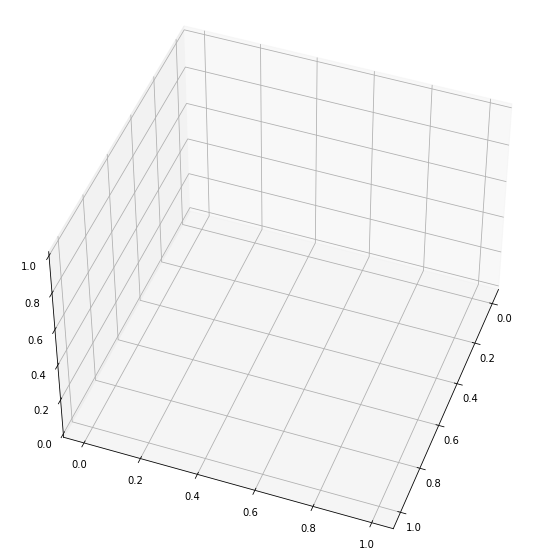

In [22]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)
print(values[1])
(theta, c_final, theta_hist, iterations, time, r) = values[1]
t =  theta_hist.T[0::15,:]
step = 20
sc = ax.scatter([], [], [], marker='o', c='k')
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(t[i,0])
    y_.append(t[i,1])
    z_.append(t[i,2])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_100c.gif', writer='pillow')


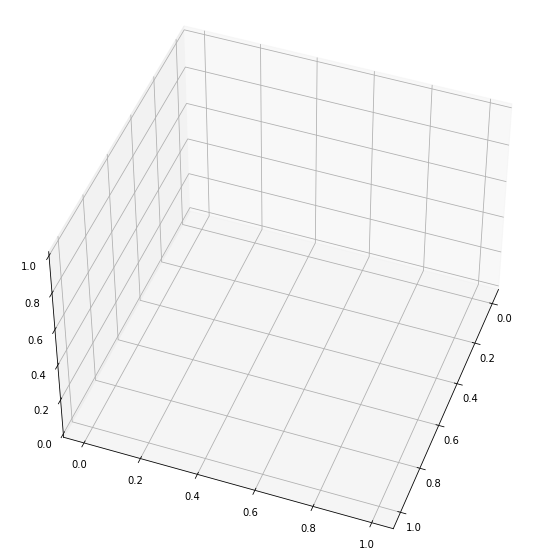

In [23]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)

(theta, c_final, theta_hist, iterations, time, r) = values[2]
t = theta_hist.T[0::15,:]
step = 20
sc = ax.scatter([], [], [], marker='o', c='k')
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(t[i,0])
    y_.append(t[i,1])
    z_.append(t[i,2])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_10000c.gif', writer='pillow')


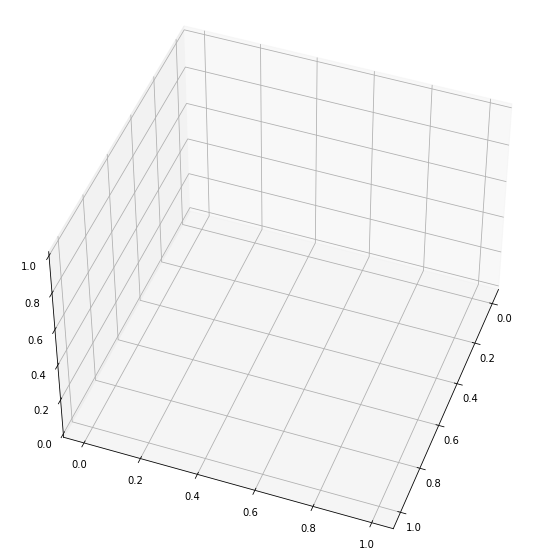

In [24]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 20)

(theta, c_final, theta_hist, iterations, time, r) = values[2]
t = theta_hist.T[0::30,:] 
step = 10
sc = ax.scatter([], [], [], marker='o', c='k')
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(t[i,0])
    y_.append(t[i,1])
    z_.append(t[i,2])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q1_1000000c.gif', writer='pillow')